In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

file_path = 'D:/BCI_RL/important/ErrP/DMD/code/IncDMD/'
sub = ['1', '2', '3', '4', '5', '6']
ses = ['1', '2']
file_name = file_path+'Subject0'+sub[2]+'_s'+ses[0]+'.mat'

epoch_eeg = scipy.io.loadmat(file_name)['errorTrial']
print(epoch_eeg.shape)  

(64, 300, 99)


In [95]:
import math 

trial = epoch_eeg[:,:,3]  # nchannel * time points

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列
nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

10
(640, 291)


In [65]:
from pydmd import DMD

dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True)    

dt = 1/ 200
dmd.fit(aug_trial)

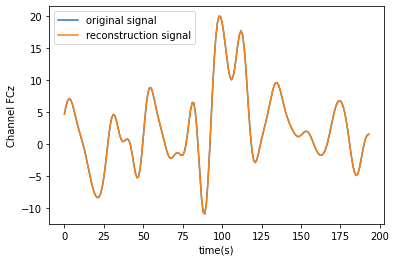

In [66]:
# DMD property
recon_trial = dmd.reconstructed_data

plt.plot(aug_trial[46], label='original signal')
plt.plot(recon_trial[46].real, label='reconstruction signal')
plt.legend()
plt.xlabel('time(s)')
plt.ylabel('Channel FCz')
plt.show()

In [67]:
dt = 1 / 200

dmd_f = dmd.frequency / dt
dmd_phi = dmd.modes
dmd_dynamic = dmd.dynamics
dmd_b = dmd.amplitudes

# print(dmd_f / dt)
print(dmd_f.size)
# print(dmd_b)

82


In [68]:
idx = [i for i in range(len(dmd_f)) if abs(dmd_f[i])>2 and abs(dmd_f[i])<13]
b = dmd_b[idx]
b = b[::2]
f = dmd_f[idx]
f = f[::2]   # 只包含正频率点
print(f)

[12.84412056 11.38819173 10.16946859  2.12253342  9.8507565   3.13609878
  9.01453564  5.09766476 12.65687896  6.1364949   6.8509249   8.02731674
  4.06501026]


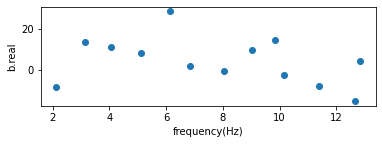

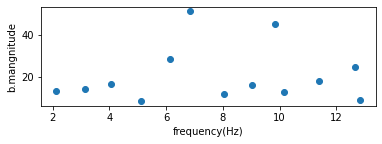

In [69]:
plt.subplot(2,1,1)
plt.scatter(f, b.real)
plt.xlabel('frequency(Hz)')
plt.ylabel('b.real')
plt.show()

plt.subplot(2,1,2)
plt.scatter(f, abs(b))
plt.xlabel('frequency(Hz)')
plt.ylabel('b.mangnitude')
plt.show()

81
[12.89694902 11.34167708 10.12622014  5.55365786  9.04550314  7.95244051
  7.65383397 12.30718943  2.14039317  6.21847191  3.05560515  5.15672289
  3.95481512]


C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 447782435.0809899. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


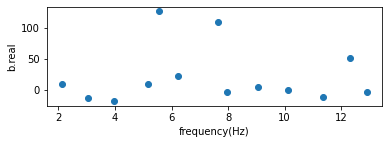

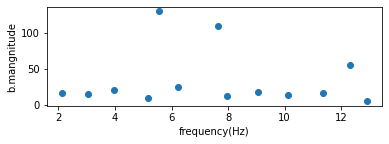

In [70]:
from pydmd import DMD

dmd = DMD(svd_rank=0, exact=True)    

dt = 1 / 200
dmd.fit(aug_trial)

dmd_f = dmd.frequency / dt
dmd_phi = dmd.modes
dmd_dynamic = dmd.dynamics
dmd_b = dmd.amplitudes

# print(dmd_f / dt)
print(dmd_f.size)
# print(dmd_b)

idx = [i for i in range(len(dmd_f)) if abs(dmd_f[i])>2 and abs(dmd_f[i])<13]
b = dmd_b[idx]
b = b[::2]
f = dmd_f[idx]
f = f[::2]   # 只包含正频率点
print(f)

plt.subplot(2,1,1)
plt.scatter(f, b.real)
plt.xlabel('frequency(Hz)')
plt.ylabel('b.real')
plt.show()

plt.subplot(2,1,2)
plt.scatter(f, abs(b))
plt.xlabel('frequency(Hz)')
plt.ylabel('b.mangnitude')
plt.show()

81
[12.89694902 11.34167708 10.12622014  5.55365786  9.04550314  7.95244051
  7.65383397 12.30718943  2.14039317  6.21847191  3.05560515  5.15672289
  3.95481512]


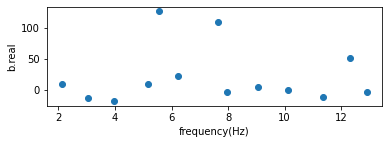

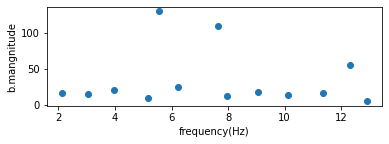

In [71]:
from pydmd import DMD

dmd = DMD(svd_rank=0, exact=True, opt=True)    

dt = 1/ 200
dmd.fit(aug_trial)

dmd_f = dmd.frequency / dt
dmd_phi = dmd.modes
dmd_dynamic = dmd.dynamics
dmd_b = dmd.amplitudes

# print(dmd_f / dt)
print(dmd_f.size)
# print(dmd_b)

idx = [i for i in range(len(dmd_f)) if abs(dmd_f[i])>2 and abs(dmd_f[i])<13]
b = dmd_b[idx]
b = b[::2]
f = dmd_f[idx]
f = f[::2]   # 只包含正频率点
print(f)

plt.subplot(2,1,1)
plt.scatter(f, b.real)
plt.xlabel('frequency(Hz)')
plt.ylabel('b.real')
plt.show()

plt.subplot(2,1,2)
plt.scatter(f, abs(b))
plt.xlabel('frequency(Hz)')
plt.ylabel('b.mangnitude')
plt.show()

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 939438146.5295485. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


101
[ 3.50792126 12.71549632 12.53574091 10.15245193 10.3687241   9.15277402
  8.16999949  2.13970386  3.17889333 12.10163164  6.75504462  5.97347542
  4.18236923  5.33553619]


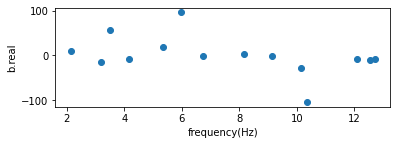

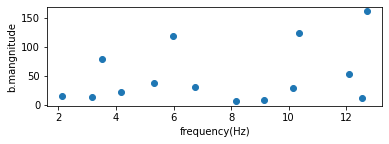

In [96]:
from pydmd import DMD

dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True)    

dt = 1/ 300
dmd.fit(aug_trial)

dmd_f = dmd.frequency / dt
dmd_phi = dmd.modes
dmd_dynamic = dmd.dynamics
dmd_b = dmd.amplitudes

# print(dmd_f / dt)
print(dmd_f.size)
# print(dmd_b)

idx = [i for i in range(len(dmd_f)) if abs(dmd_f[i])>2 and abs(dmd_f[i])<13]
b = dmd_b[idx]
b = b[::2]
f = dmd_f[idx]
f = f[::2]   # 只包含正频率点
print(f)

plt.subplot(2,1,1)
plt.scatter(f, b.real)
plt.xlabel('frequency(Hz)')
plt.ylabel('b.real')
plt.show()

plt.subplot(2,1,2)
plt.scatter(f, abs(b))
plt.xlabel('frequency(Hz)')
plt.ylabel('b.mangnitude')
plt.show()

In [118]:
# aug_trial(448, 194)无重叠分段计算b
dmd = DMD(svd_rank=0, tlsq_rank=100, exact=True, opt=True)    
dt = 1 / 300

seg = 5
row, col = len(aug_trial), len(aug_trial[0])

fbpack = []
hop = col//seg
for i in range(seg):
    seg_trial = aug_trial[:, hop*i:hop*(i+1)]
    dmd.fit(seg_trial)
    dmd_f = dmd.frequency / dt
    dmd_b = dmd.amplitudes
    
    idx = [i for i in range(len(dmd_f)) if abs(dmd_f[i])>=1 and abs(dmd_f[i])<=13]
    b = dmd_b[idx][::2]
    f = dmd_f[idx][::2]   # 只包含正频率点
    fb = list(zip(f, b))
    fb.sort(key=lambda x:x[0])
    fbpack.append(fb)
    

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 91463919.63974135. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 87069494.59526324. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 218488763.5984458. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number
C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 205488590.05938956. Consider preprocessing data, passing in augmented data matrix, or regularization me

In [119]:
print(len(fbpack), len(fbpack[1]))
fbpack = np.array(fbpack)
fmean, dynab = [], []
for i in range(len(fbpack[0])):
    fmean.append(np.mean(fbpack[:,i][:,0].real))
    dynab.append(list(fbpack[:,i][:,1]))

5 4


In [120]:
fmean = np.array(fmean)
fmean = np.around(fmean, 2)
dynab = np.array(dynab)
dynab = np.absolute(dynab)

# plt.matshow(dynab)
# plt.show()

<AxesSubplot:>

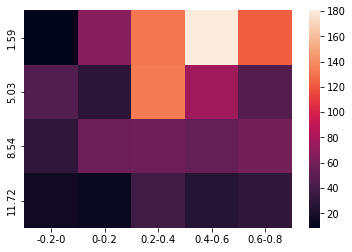

In [121]:
import seaborn as sns

sns.heatmap(data=dynab,
           yticklabels=list(map(str,fmean)),
           xticklabels=['-0.2-0','0-0.2','0.2-0.4','0.4-0.6','0.6-0.8'])

In [122]:
print(fbpack[:,0][:,0].real)

[3.51675703 1.27365029 1.01468089 1.05770227 1.1020795 ]


In [123]:
print(fbpack[:,1][:,0].real)

[6.3129209  4.46435296 3.48493397 4.30848185 6.57557208]


In [124]:
print(fbpack[:,2][:,0].real)

[8.97716871 8.54448466 8.47948665 8.55355918 8.15574577]


In [125]:
print(fbpack[:,3][:,0].real)

[12.78146584 10.34286306 10.89697309 12.0373128  12.53190919]
